In [1]:
from keras.models import load_model
from keras.datasets import reuters
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 10000)

Using TensorFlow backend.


In [2]:
print(x_train.shape)
print(y_train.shape)

(8982,)
(8982,)


In [3]:
print(y_train)

[ 3  4  3 ... 25  3 25]


In [4]:
from keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [5]:
print(Y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (8982, 2000)
x_test shape: (2246, 2000)


In [7]:
print(x_train)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [8]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, BatchNormalization,LSTM
model = Sequential()
model.add(Embedding(10000,8))
model.add(LSTM(128))
model.add(Dense(46, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 8)           80000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               70144     
_________________________________________________________________
dense_1 (Dense)              (None, 46)                5934      
Total params: 156,078
Trainable params: 156,078
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(x_train,Y_train,epochs = 5, batch_size = 32, validation_split=0.1)
model.save("lstm_2.h5")

C:\Users\divya\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 475s 59ms/step - loss: 0.0862 - acc: 0.9755 - val_loss: 0.0741 - val_acc: 0.9783
Epoch 2/5
8083/8083 [==============================] - 302s 37ms/step - loss: 0.0723 - acc: 0.9783 - val_loss: 0.0739 - val_acc: 0.9783
Epoch 3/5
8083/8083 [==============================] - 315s 39ms/step - loss: 0.0721 - acc: 0.9783 - val_loss: 0.0741 - val_acc: 0.9783
Epoch 4/5
8083/8083 [==============================] - 311s 38ms/step - loss: 0.0720 - acc: 0.9783 - val_loss: 0.0736 - val_acc: 0.9783
Epoch 5/5
8083/8083 [==============================] - 313s 39ms/step - loss: 0.0719 - acc: 0.9783 - val_loss: 0.0740 - val_acc: 0.9783


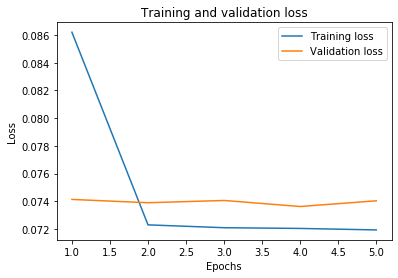

In [10]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs,loss,label='Training loss')
plt.plot(epochs,val_loss,label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

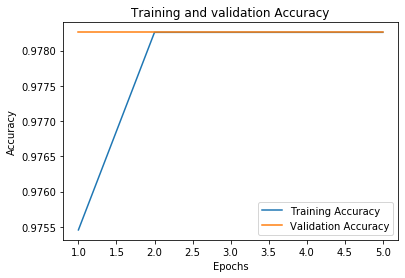

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(acc) + 1)
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
result =model.evaluate(x_test,Y_test)
print(result)

2246/2246 [==============================] - 17s 8ms/step
[0.07250244192653008, 0.9782605171203613]


In [13]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, BatchNormalization,LSTM
model = Sequential()
model.add(Embedding(10000,8))
model.add(LSTM(25,return_sequences=True))
model.add(LSTM(25))
model.add(Dense(46, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 8)           80000     
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 25)          3400      
_________________________________________________________________
lstm_3 (LSTM)                (None, 25)                5100      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                1196      
Total params: 89,696
Trainable params: 89,696
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(x_train,Y_train,epochs = 5, batch_size = 32, validation_split=0.1)
model.save("lstm_2_1.h5")

C:\Users\divya\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 285s 35ms/step - loss: 0.1623 - acc: 0.9573 - val_loss: 0.0737 - val_acc: 0.9783
Epoch 2/5
8083/8083 [==============================] - 281s 35ms/step - loss: 0.0719 - acc: 0.9783 - val_loss: 0.0735 - val_acc: 0.9783
Epoch 3/5
8083/8083 [==============================] - 282s 35ms/step - loss: 0.0733 - acc: 0.9783 - val_loss: 0.0735 - val_acc: 0.9783
Epoch 4/5
8083/8083 [==============================] - 285s 35ms/step - loss: 0.0718 - acc: 0.9783 - val_loss: 0.0735 - val_acc: 0.9783
Epoch 5/5
8083/8083 [==============================] - 284s 35ms/step - loss: 0.0718 - acc: 0.9783 - val_loss: 0.0736 - val_acc: 0.9783


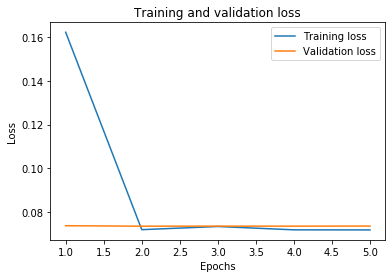

In [15]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs,loss,label='Training loss')
plt.plot(epochs,val_loss,label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
result =model.evaluate(x_test,Y_test)
print(result)

2246/2246 [==============================] - 10s 4ms/step
[0.07206905480616876, 0.9782605171203613]
